<a href="https://colab.research.google.com/github/zaimhusnun/Supervised-Machine-Learning/blob/main/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model, metrics

# Multivariate Regression

## Getting data
dengan menggunakan data yang didownload dari kaggle.com akan dianalisis menggunakan metode analisis regresi untuk melihat faktor-faktor yang berpengaruh terhadap nilai jual dari rumah.

In [ ]:
df=pd.read_csv("train.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


## Mengambil data yang akan dianalisis dan preparation data

In [ ]:
y=df["SalePrice"]     #variabel target
x1=df["LotArea"]      #variabel prediktor 1 numerik
x2=df['LotFrontage']  #variabel prediktor 2 numerik
x3=df['MSSubClass']  #variabel prediktor 3 kategorik

### cek apakah ada NA

In [ ]:
y.isnull().sum()

0

In [ ]:
x1.isnull().sum()

0

In [ ]:
x2.isnull().sum()

259

In [ ]:
x3.isnull().sum()

0

#### terdapat NA di variabel prediktor 2, maka harus diatasi. karena jumlah data yang NA adalah kurang dari 20% maka data akan dihapus.

In [ ]:
data=df[['SalePrice','LotArea','LotFrontage','MSSubClass']]
df_update = data.dropna(axis = 0).reset_index(drop = True)
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SalePrice    1201 non-null   int64  
 1   LotArea      1201 non-null   int64  
 2   LotFrontage  1201 non-null   float64
 3   MSSubClass   1201 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 37.7 KB


In [ ]:
y=df_update["SalePrice"]     #variabel target
x=df_update[["LotArea", "LotFrontage", "MSSubClass"]]

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4,
                                                    random_state=0)

In [ ]:
 # create linear regression object
reg = linear_model.LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# regression coefficients
print('Coefficients: ', reg.coef_)

# regression intercept
print('Intercept: ', reg.intercept_)

Coefficients:  [  5.27849801 955.4274715  192.36902874]
Intercept:  50395.642373929295


In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
# MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

58491.64820529934

In [ ]:
# MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

8069013031.209805

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred, squared=False)

89827.68521569397

## interpretasi
Model regresi yang didapatkan untuk memodelkan harga rumah yang ada pada data adalah
y=50395.64+5.27849801 b1 + 955.4274715 b2 + 192.36902874 b3
ketiga variabel prediktor berpengaruh positif terhadap variabel harga penjualan rumah.
namun, jika dilihat dari matrik evaluasinya masih tergolong besar. jadi, model ini kurang dapat untuk memprediksi harga dari penjualan rumah yang ada.
Nilai metrik evaluasi:
MAE = 58491.64820529934
MSE = 8069013031.209805
RMSE= 89827.68521569397


# Classification Models

## Getting data
dengan menggunakan data yang didownload dari kaggle.com akan dianalisis menggunakan metode analisis regresi untuk melihat faktor-faktor yang berpengaruh terhadap nilai jual dari rumah.

In [ ]:
df=pd.read_csv("heart.csv")
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Data Preparation ( Encoding)

In [ ]:
## Check the proportion of 0 and 1 in Churn label
df["HeartDisease"].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

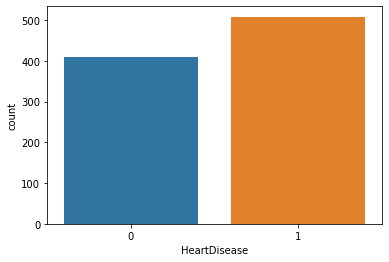

In [ ]:
import seaborn as sns
sns.countplot(df["HeartDisease"])

In [ ]:
from sklearn.utils import resample

#create two different dataframe of majority and minority class
df_majority = df[(df['HeartDisease']==1)]
df_minority = df[(df['HeartDisease']==0)]
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 508, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [ ]:
df_upsampled["HeartDisease"].value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [ ]:
df = df[["Age", "Sex", "ChestPainType", "Cholesterol", "MaxHR", "RestingBP", "HeartDisease"]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            918 non-null    int64 
 1   Sex            918 non-null    object
 2   ChestPainType  918 non-null    object
 3   Cholesterol    918 non-null    int64 
 4   MaxHR          918 non-null    int64 
 5   RestingBP      918 non-null    int64 
 6   HeartDisease   918 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 50.3+ KB


In [ ]:
#one hot encoding
df = pd.get_dummies(df)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Age                918 non-null    int64
 1   Cholesterol        918 non-null    int64
 2   MaxHR              918 non-null    int64
 3   RestingBP          918 non-null    int64
 4   HeartDisease       918 non-null    int64
 5   Sex_F              918 non-null    uint8
 6   Sex_M              918 non-null    uint8
 7   ChestPainType_ASY  918 non-null    uint8
 8   ChestPainType_ATA  918 non-null    uint8
 9   ChestPainType_NAP  918 non-null    uint8
 10  ChestPainType_TA   918 non-null    uint8
dtypes: int64(5), uint8(6)
memory usage: 41.4 KB


## Define Variabel Response and Predictor

In [ ]:
# defining feature matrix(X) and response vector(y)
X = df.loc[:, df.columns != 'HeartDisease']
y = df["HeartDisease"]

In [ ]:
# splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=1)

## Random Forest Clasification

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

RandomForestClassifier(n_jobs=-1, random_state=42)

## Hyperparameter Tuning for Random Forest

In [ ]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
grid_search.best_score_

0.8127710779646673

In [ ]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=10, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [ ]:
### menggunakan hasil dari hyperparameter tuning, maka disesuaikan max dept dan n estimatornya
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=10,
                                       n_estimators=50, oob_score=True)

classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50, n_jobs=-1, oob_score=True,
                       random_state=42)

In [ ]:
y_rf = rf_best.predict(X_test)

## Evalution Matrix

In [ ]:
#akurasi dari model random forest
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_rf))

0.8043478260869565


In [ ]:
#confussion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_rf))

[[118  35]
 [ 37 178]]


In [ ]:
#auc dari random forest
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.7995744034047728


In [ ]:
#calsification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       153
           1       0.84      0.83      0.83       215

    accuracy                           0.80       368
   macro avg       0.80      0.80      0.80       368
weighted avg       0.80      0.80      0.80       368



## Interpretasi
Jika dilihat dari nilai acurasi yang bernilai 80%, maka model yang dibentuk sudah bagus. Karena mampu untuk memprediksi 80% dari populasi. Jika dilihat dari nilai AUC yang bernilai 79,95%, maka model tersebut juga sudah bagus. Untuk lebih rincinya dapat dilihat dari hasil clasification report dan confussion matrix